In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
from datetime import datetime
plt.rcParams['figure.figsize'] = 1*np.array([16.18033, 10])    #golden ratio

In [196]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter1_new_mode15_all_prime_10-20.csv")
data = data.reset_index(drop=True)

In [197]:
data.columns

Index(['Unnamed: 0', 'Steps', 'Q', 'Rg', 'GXXXG', 'CBD_excl', 'S_chain',
       'Helix_ori', 'Backbone', 'Rama', 'Contact', 'Fragment', 'Membrane',
       'ER', 'TBM_Q', 'Beta', 'Pap', 'Helical', 'P_inside', 'Total', 'Run',
       'Protein', 'Folder'],
      dtype='object')

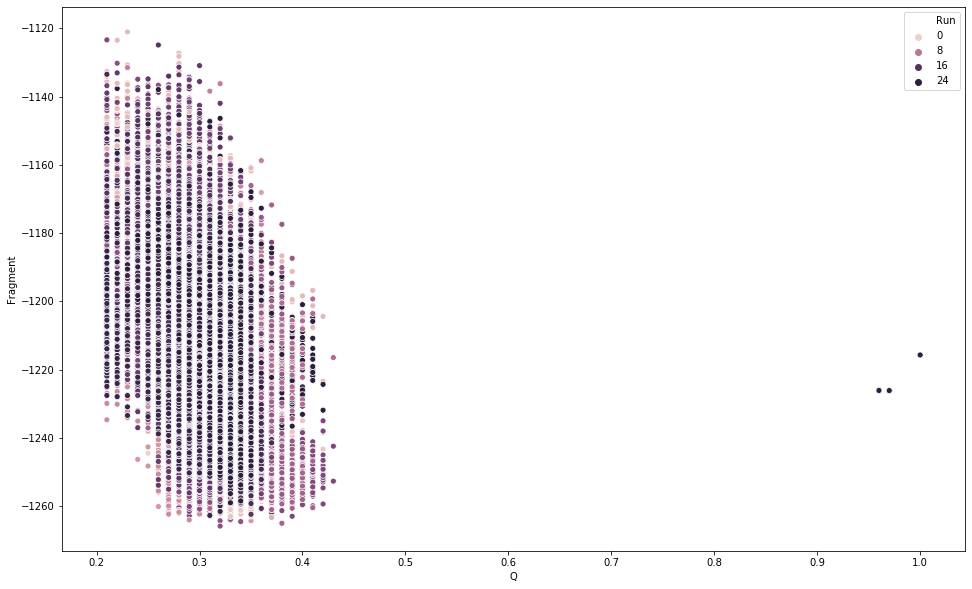

In [201]:
chosen = data.query("Protein == '1u19' and Q > 0.2")
sns.scatterplot("Q", "Fragment", hue="Run", data=chosen)

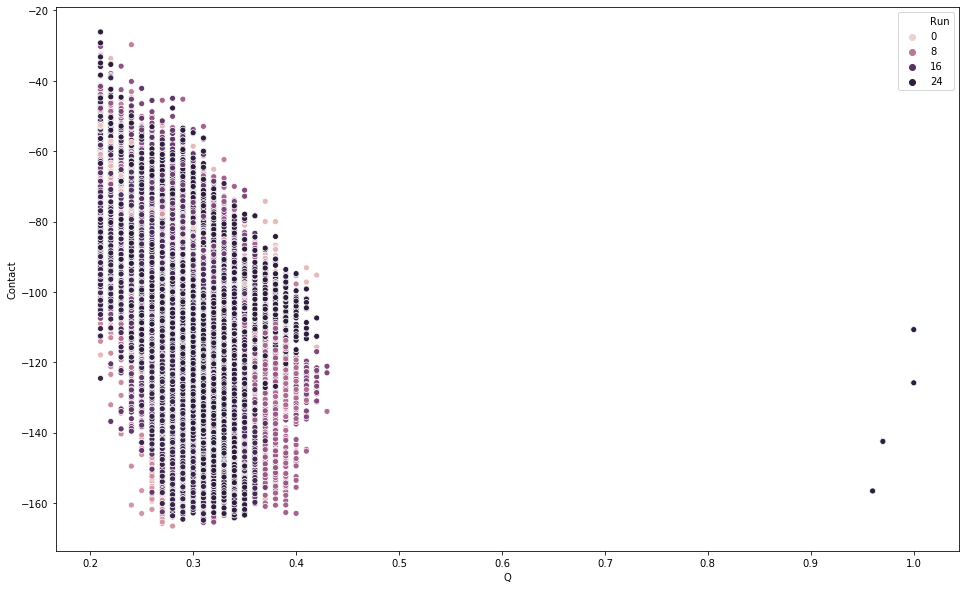

In [203]:
chosen = data.query("Protein == '1u19' and Q > 0.2")
sns.scatterplot("Q", "Contact", hue="Run", data=chosen)

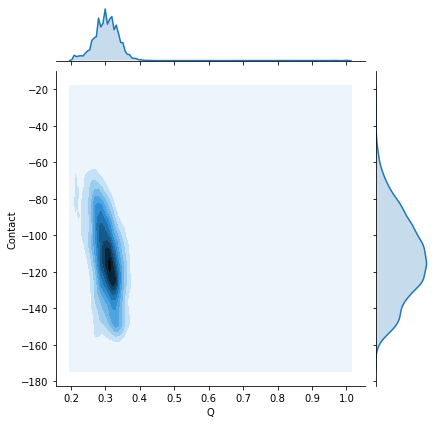

In [207]:
sns.jointplot("Q", "Contact", kind="kde", data=chosen)

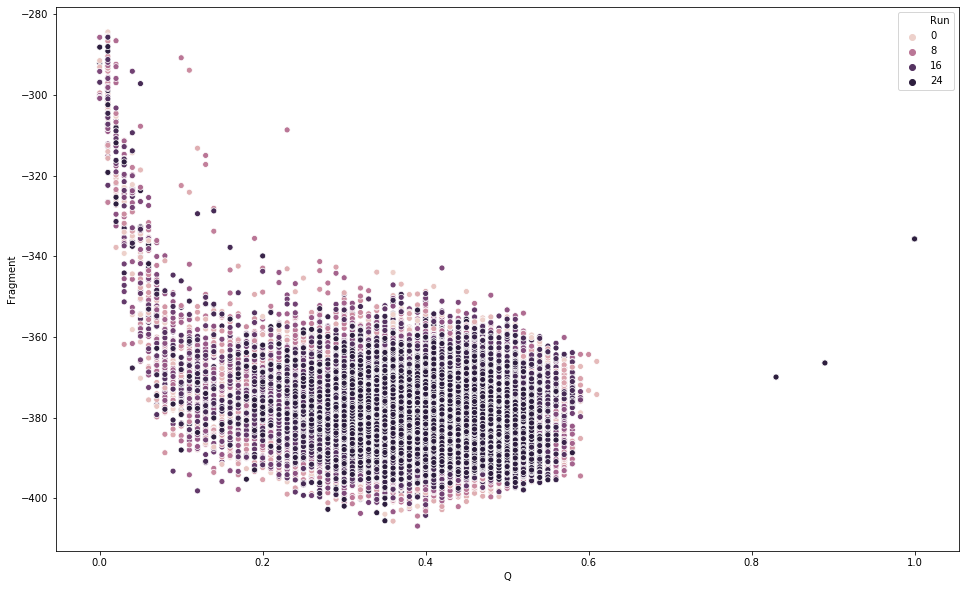

In [198]:
chosen = data.query("Protein == '2bg9'")
sns.scatterplot("Q", "Fragment", hue="Run", data=chosen)

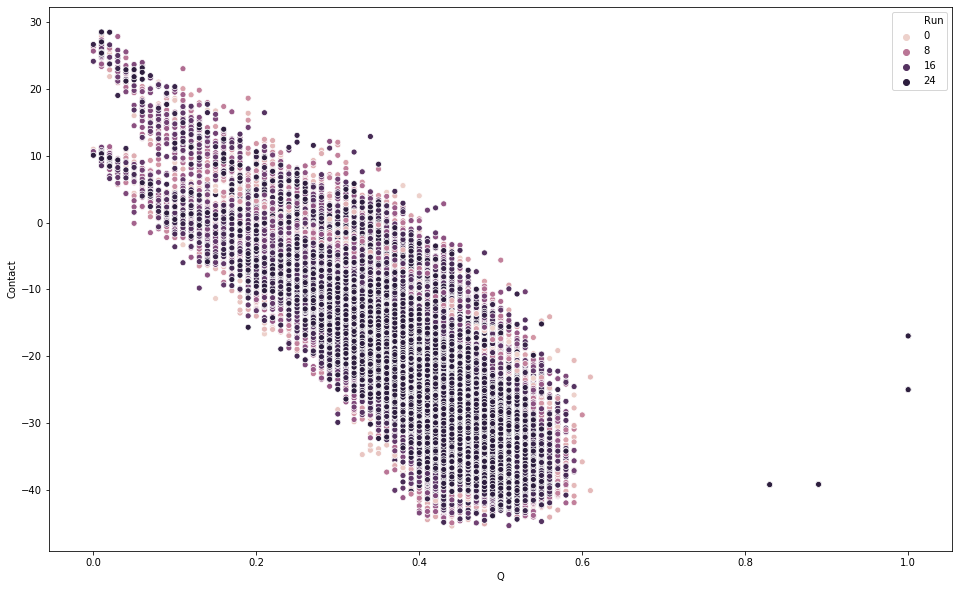

In [199]:
chosen = data.query("Protein == '2bg9'")
sns.scatterplot("Q", "Contact", hue="Run", data=chosen)

In [191]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode20_decoy50_10-17.csv")
data = data.reset_index(drop=True)

In [194]:
data["Protein"].unique()

array(['2bg9', '1j4n', '1py6_SD', '2bl2', '1iwg', '2ic8', '1pv6', '1occ',
       '1kpl', '2bs2', '1py6', '1u19'], dtype=object)

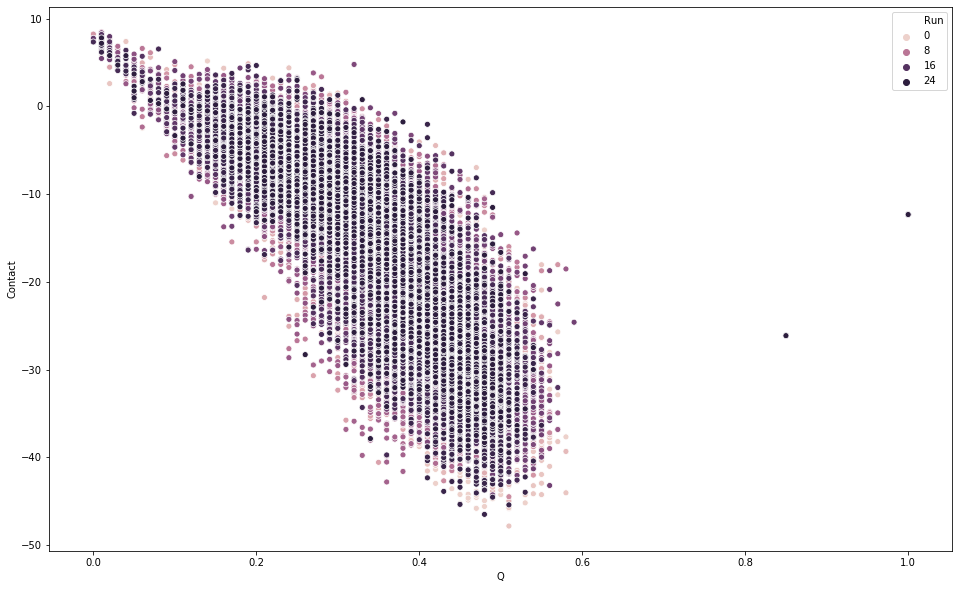

In [192]:
chosen = data.query("Protein == '2bg9'")
sns.scatterplot("Q", "Contact", hue="Run", data=chosen)

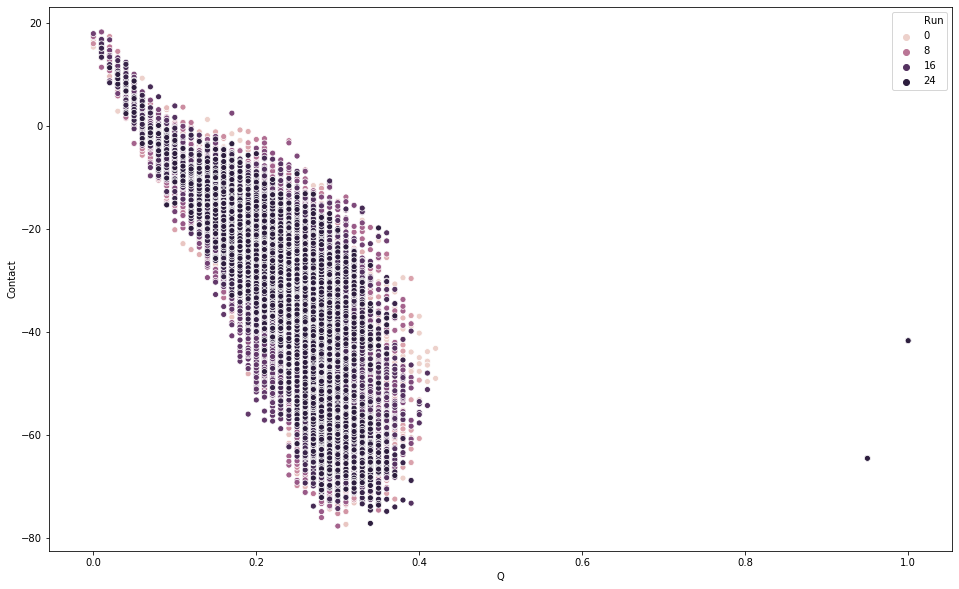

In [195]:
chosen = data.query("Protein == '1iwg'")
sns.scatterplot("Q", "Contact", hue="Run", data=chosen)

In [165]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode18_10-16.csv")
data = data.reset_index(drop=True)

In [168]:
chosen = data.query("Protein == '2bg9'")

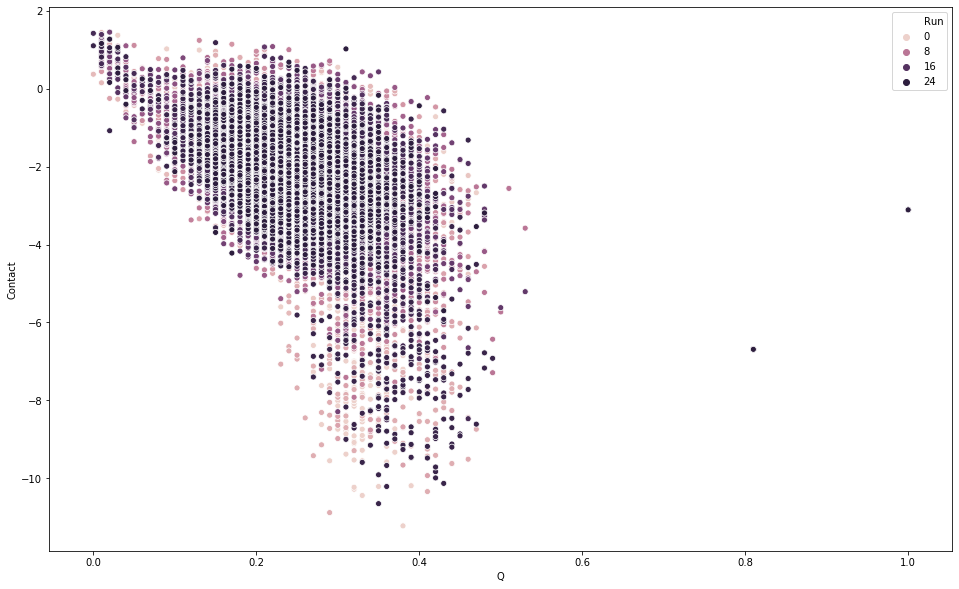

In [169]:
sns.scatterplot("Q", "Contact", hue="Run", data=chosen)

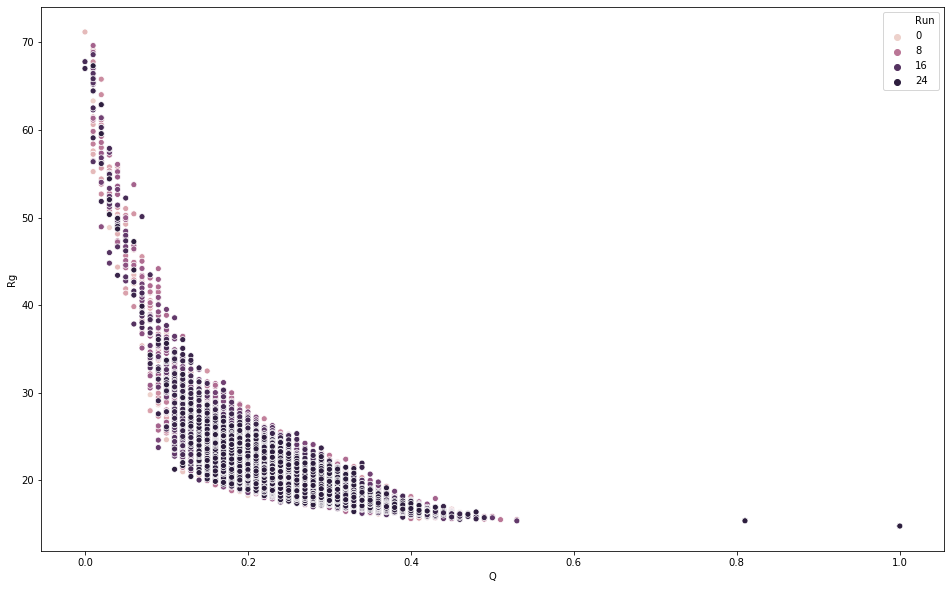

In [170]:
sns.scatterplot("Q", "Rg", hue="Run", data=chosen)

In [21]:
data_single_mem = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-29.csv")

In [23]:
data_single_mem.shape

(1921920, 23)

In [4]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_frag_new_contact_only_cutoff550_10-02.csv")
data = data.reset_index(drop=True)

In [25]:
all_data = pd.concat([data_single_mem, data]).reset_index(drop=True)

In [28]:
all_data["Folder"].unique()

array(['single_frag_new_cb', 'no_contact', 'new_contact_only_cutoff550',
       'standard_timeStep2', 'ha_frag', 'he_frag',
       'new_contact_only_cutoff450', 'ha_frag_new_contact_only_cutoff550'],
      dtype=object)

In [5]:
data.shape

(2402400, 23)

In [7]:
data["Folder"].unique()

array(['ha_frag', 'he_frag', 'new_contact_only_cutoff450',
       'new_contact_only_cutoff550', 'ha_frag_new_contact_only_cutoff550'],
      dtype=object)

In [9]:
data["Protein"].unique()

array(['2bg9', '1j4n', '1py6_SD', '2bl2', '1iwg', '2ic8', '1pv6', '1occ',
       '1kpl', '2bs2', '1py6', '1u19'], dtype=object)

In [11]:
chosen = data.query("Protein=='1kpl' and Folder=='ha_frag_new_contact_only_cutoff550'")

In [13]:
chosen.columns

Index(['Unnamed: 0', 'Steps', 'Q', 'Rg', 'GXXXG', 'CBD_excl', 'S_chain',
       'Helix_ori', 'Backbone', 'Rama', 'Contact', 'Fragment', 'Membrane',
       'ER', 'TBM_Q', 'Beta', 'Pap', 'Helical', 'P_inside', 'Total', 'Run',
       'Protein', 'Folder'],
      dtype='object')

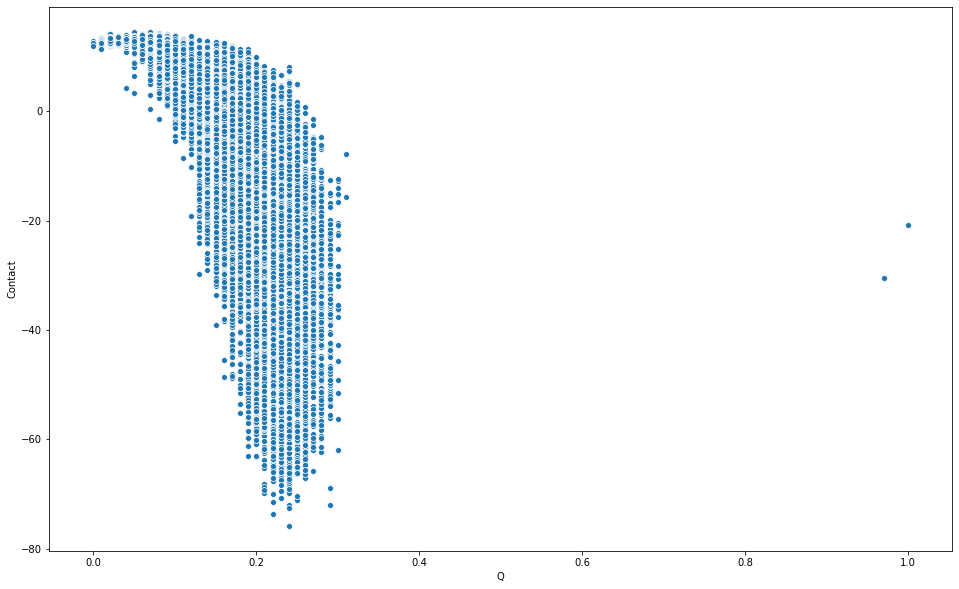

In [14]:
sns.scatterplot("Q", "Contact", data=chosen)

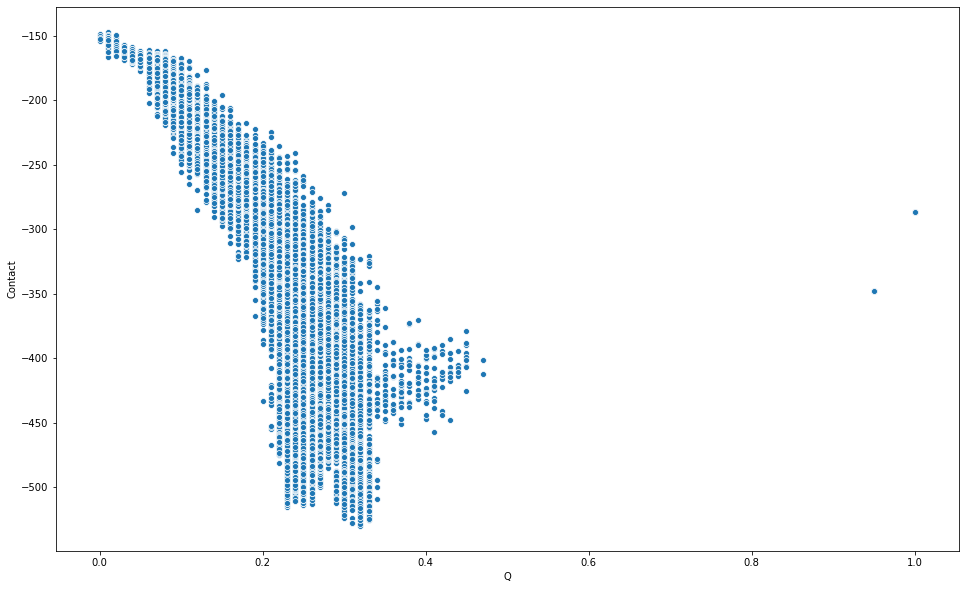

In [15]:
chosen = data.query("Protein=='1kpl' and Folder=='ha_frag'")
sns.scatterplot("Q", "Contact", data=chosen)

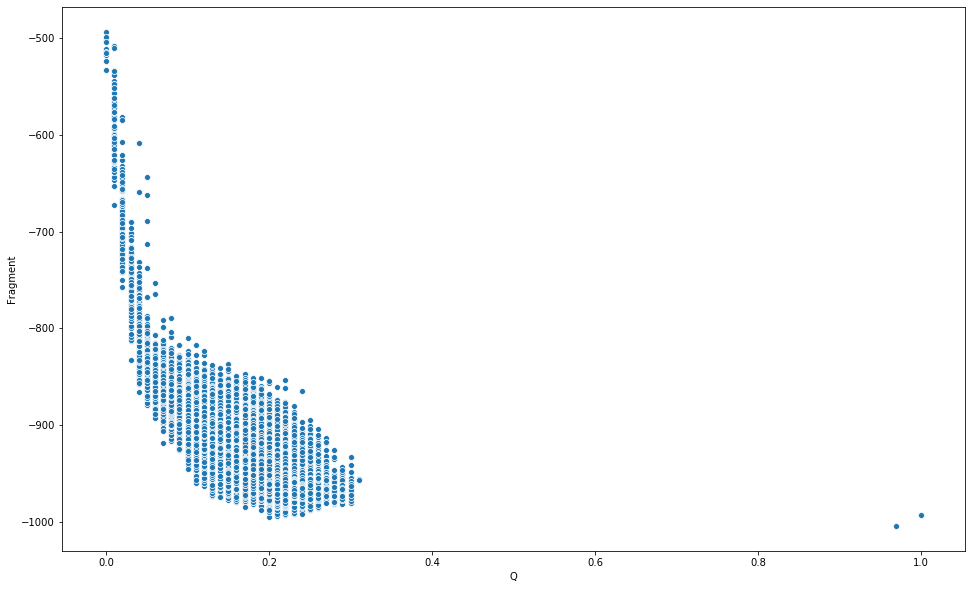

In [16]:
chosen = data.query("Protein=='1kpl' and Folder=='ha_frag_new_contact_only_cutoff550'")
sns.scatterplot("Q", "Fragment", data=chosen)

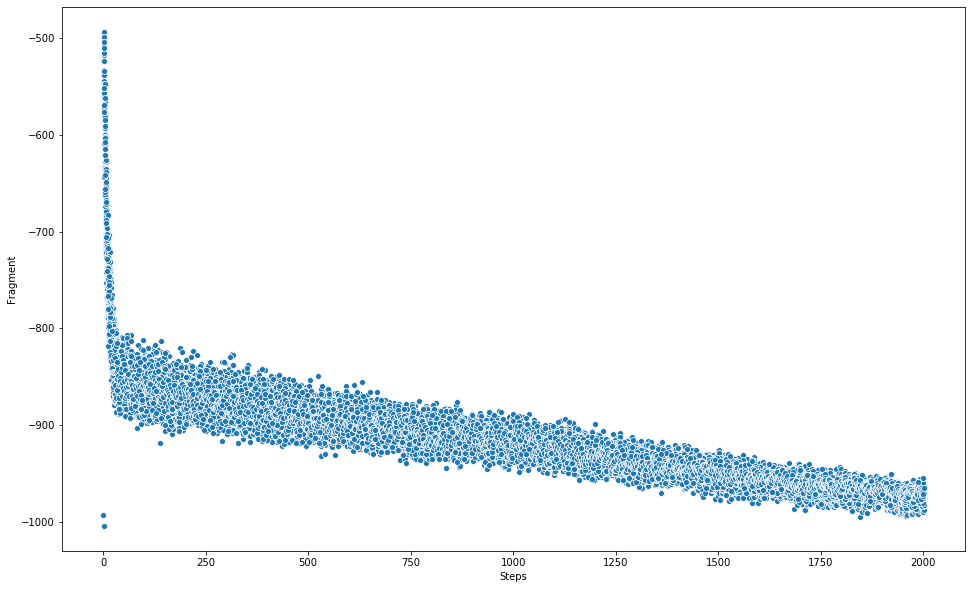

In [17]:
chosen = data.query("Protein=='1kpl' and Folder=='ha_frag_new_contact_only_cutoff550'")
sns.scatterplot("Steps", "Fragment", data=chosen)

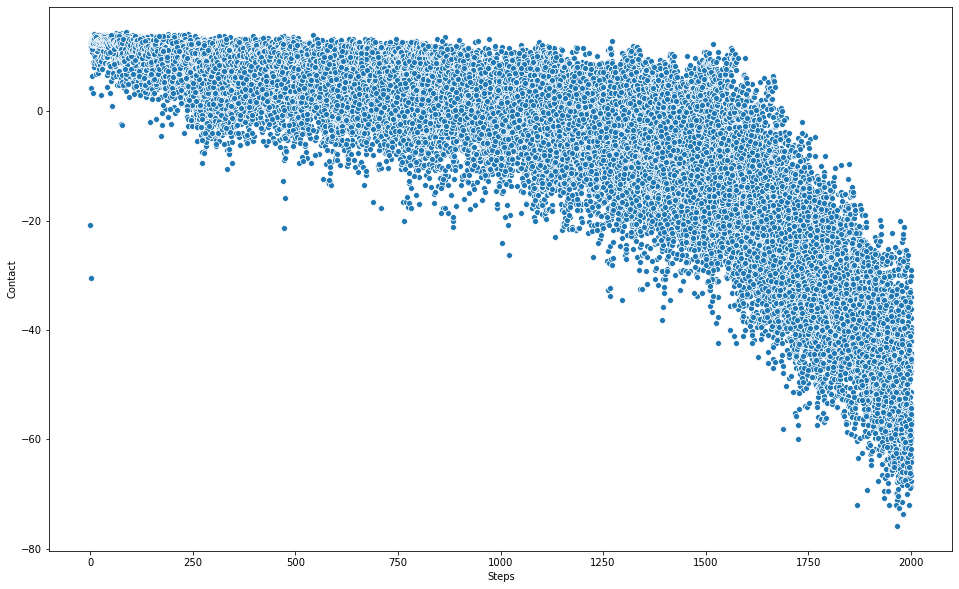

In [18]:
chosen = data.query("Protein=='1kpl' and Folder=='ha_frag_new_contact_only_cutoff550'")
sns.scatterplot("Steps", "Contact", data=chosen)

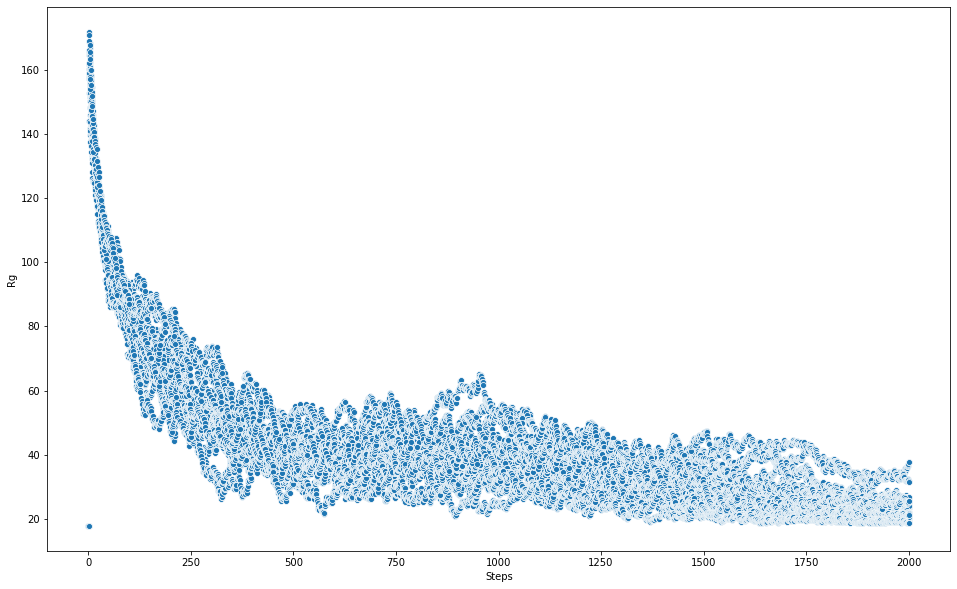

In [20]:
chosen = data.query("Protein=='1py6' and Folder=='ha_frag_new_contact_only_cutoff550'")
sns.scatterplot("Steps", "Rg", data=chosen)

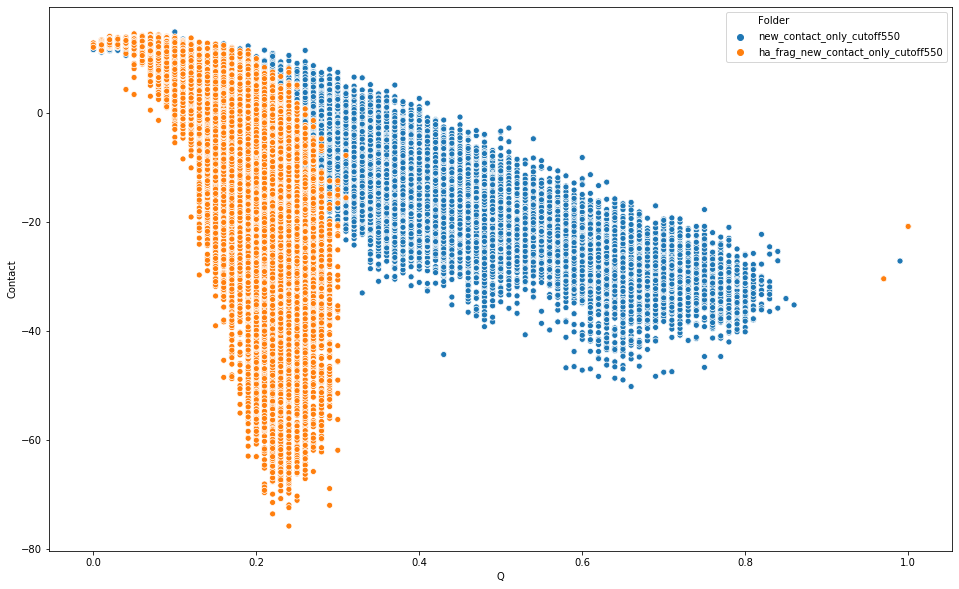

In [30]:

chosen = all_data.query("Protein=='1kpl' and (Folder=='ha_frag_new_contact_only_cutoff550' or Folder=='new_contact_only_cutoff550')")
sns.scatterplot("Q", "Contact", hue="Folder", data=chosen)

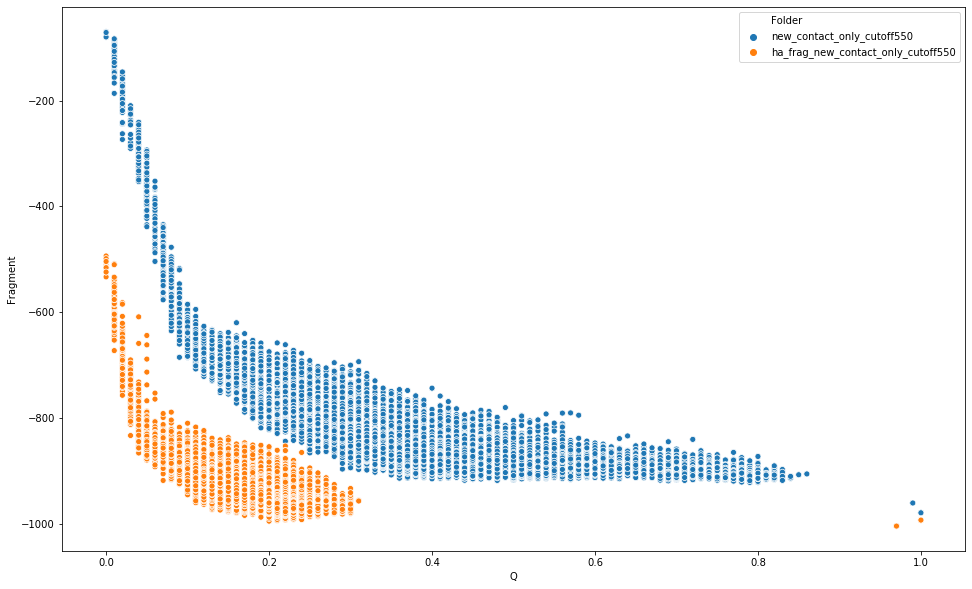

In [32]:

chosen = all_data.query("Protein=='1kpl' and (Folder=='ha_frag_new_contact_only_cutoff550' or Folder=='new_contact_only_cutoff550')")
sns.scatterplot("Q", "Fragment", hue="Folder", data=chosen)

In [33]:
chosen.columns

Index(['Unnamed: 0', 'Steps', 'Q', 'Rg', 'GXXXG', 'CBD_excl', 'S_chain',
       'Helix_ori', 'Backbone', 'Rama', 'Contact', 'Fragment', 'Membrane',
       'ER', 'TBM_Q', 'Beta', 'Pap', 'Helical', 'P_inside', 'Total', 'Run',
       'Protein', 'Folder'],
      dtype='object')

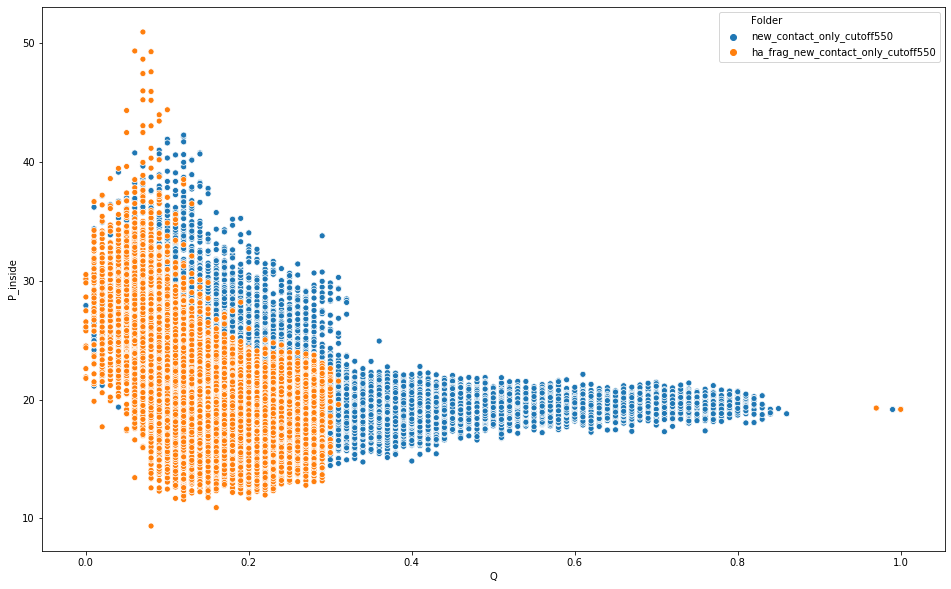

In [35]:

chosen = all_data.query("Protein=='1kpl' and (Folder=='ha_frag_new_contact_only_cutoff550' or Folder=='new_contact_only_cutoff550')")
sns.scatterplot("Q", "P_inside", hue="Folder", data=chosen)

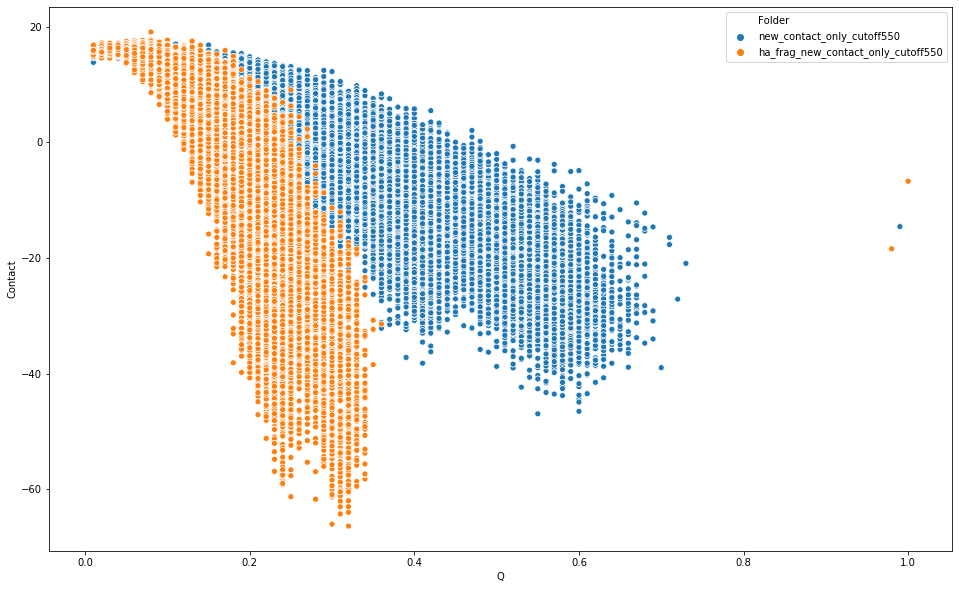

In [36]:
chosen = all_data.query("Protein=='1py6' and (Folder=='ha_frag_new_contact_only_cutoff550' or Folder=='new_contact_only_cutoff550')")
sns.scatterplot("Q", "Contact", hue="Folder", data=chosen)

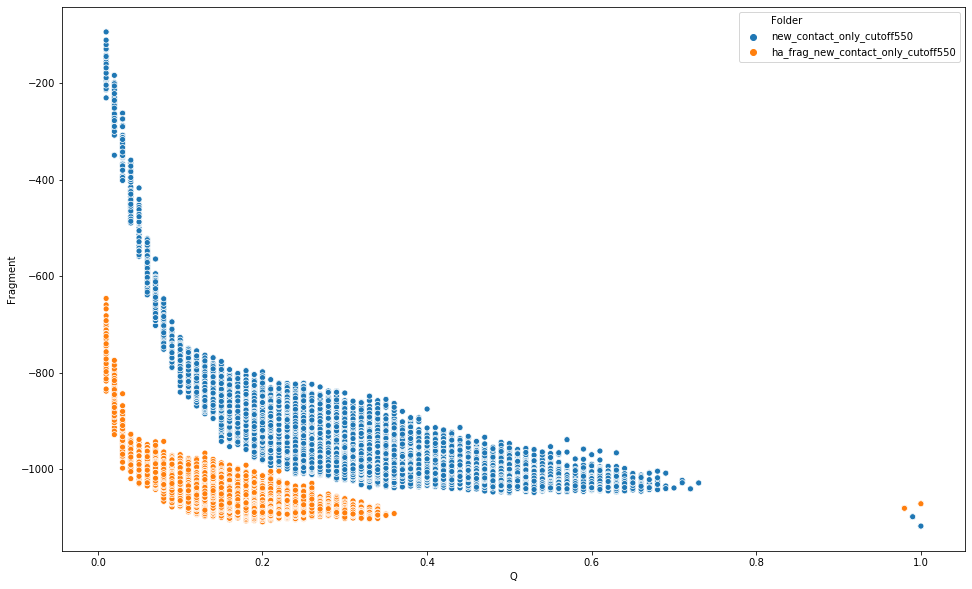

In [37]:

chosen = all_data.query("Protein=='1py6' and (Folder=='ha_frag_new_contact_only_cutoff550' or Folder=='new_contact_only_cutoff550')")
sns.scatterplot("Q", "Fragment", hue="Folder", data=chosen)

In [39]:
info = pd.read_csv("/Users/weilu/Research/server/oct_2020/prediction_target_information/info_folder/1py6_complete.csv")

In [41]:
info["interactionTerm"].unique()

array(['contact', 'fourBody'], dtype=object)

In [44]:
gamma = np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/gamma_folder/contact_cutoff550.dat")

In [45]:
gamma.shape

(690,)

In [51]:
energy = 0
for i, line in info.query("interactionTerm=='contact' and Type !='Burial'").iterrows():
    # print(i)
    interaction_index = line["interaction_index"]
    phi = line["phi"]
    energy += phi * gamma[interaction_index]
energy

-19.52118943133509

In [52]:
info.query("interactionTerm=='contact' and Type !='Burial'").query("phi > 0.1")

Unnamed: 0       phi  res1  res2                 Type res1_name  \
1              1  0.924684     0    61  HighDensityMediated       THR   
4              4  0.953461     0    58   LowDensityMediated       THR   
10            10  0.586493     1    58   LowDensityMediated       GLY   
14            14  0.999965     2   196  HighDensityMediated       ARG   
16            16  0.999839     2    61  HighDensityMediated       ARG   
...          ...       ...   ...   ...                  ...       ...   
1708        1708  0.999798   187   202  HighDensityMediated       GLY   
1709        1709  1.000000   187   199               Direct       GLY   
1713        1713  0.997052   188   200  HighDensityMediated       SER   
1714        1714  0.999942   188   199               Direct       SER   
1718        1718  0.999916   189   199  HighDensityMediated       GLU   

     res2_name  interaction_index interactionTerm  res1_2  res2_2 direction  \
1          LEU                371         contact     NaN     NaN       NaN   
4          GLY                548         contact     NaN     NaN       NaN   
10         GLY                539         contact     NaN     NaN       NaN   
14         LEU                239         contact     NaN     NaN       NaN   
16         LEU                239         contact     NaN     NaN       NaN   
...        ...                ...             ...     ...     ...       ...   
1708       LEU                332         contact     NaN     NaN       NaN   
1709       GLU                106         contact     NaN     NaN       NaN   
1713       THR                406         contact     NaN     NaN       NaN   
1714       GLU                114         contact     NaN     NaN       NaN   
1718       GLU                315         contact     NaN     NaN       NaN   

     res1_2_name res2_2_name  
1            NaN         NaN  
4            NaN         NaN  
10           NaN         NaN  
14           NaN         NaN  
16           NaN         NaN  
...          ...         ...  
1708         NaN         NaN  
1709         NaN         NaN  
1713         NaN         NaN  
1714         NaN         NaN  
1718         NaN         NaN  

[844 rows x 14 columns]

In [53]:
energy = 0
for i, line in info.query("interactionTerm=='contact' and Type =='Direct'").iterrows():
    # print(i)
    interaction_index = line["interaction_index"]
    phi = line["phi"]
    energy += phi * gamma[interaction_index]
energy

6.4035888212216765

In [54]:
energy = 0
for i, line in info.query("interactionTerm=='contact' and Type =='LowDensityMediated'").iterrows():
    # print(i)
    interaction_index = line["interaction_index"]
    phi = line["phi"]
    energy += phi * gamma[interaction_index]
energy

-2.63117944276467

In [55]:
energy = 0
for i, line in info.query("interactionTerm=='contact' and Type =='HighDensityMediated'").iterrows():
    # print(i)
    interaction_index = line["interaction_index"]
    phi = line["phi"]
    energy += phi * gamma[interaction_index]
energy

-23.29359880979211

In [56]:
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors


def get_A_B(pre, n=201, first_half=False, second_half=False,):
    # pre = "/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_msa_mode_3/gamma_mode_3"
    A = np.load(f"{pre}/average_A.npy", allow_pickle=True)
    B = np.load(f"{pre}/average_B.npy", allow_pickle=True)
    A_prime = np.load(f"{pre}/average_A_prime.npy", allow_pickle=True)
    half_B = np.load(f"{pre}/average_half_B.npy", allow_pickle=True)
    other_half_B = np.load(f"{pre}/average_other_half_B.npy", allow_pickle=True)
    std_half_B = np.load(f"{pre}/average_std_half_B.npy", allow_pickle=True)
#     A = A[:n]
#     B = B[:n,:n]
#     A_prime = A_prime[:n]
#     half_B = half_B[:n,:n]
#     other_half_B = other_half_B[:n, :n]
#     std_half_B = std_half_B[:n, :n]
    if second_half:
        half_n = int(n/2)
        A = A[half_n:]
        B = B[half_n:,half_n:]
        A_prime = A_prime[half_n:]
        half_B = half_B[half_n:,half_n:]
        other_half_B = other_half_B[half_n:, half_n:]
        std_half_B = std_half_B[half_n:, half_n:]
    A_B_dic = {}
    A_B_dic["A"] = A
    A_B_dic["B"] = B
    A_B_dic["half_B"] = half_B
    A_B_dic["other_half_B"] = other_half_B
    A_B_dic["std_half_B"] = std_half_B
    A_B_dic["A_prime"] = A_prime
    return A_B_dic

def get_gamma(A, B, A_prime, c=-100, cutoff_range=range(100, 210, 10)):
    gamma_cutoff_dic = {}
    for cutoff in list(cutoff_range):
        # cutoff = 400
        lamb, P = np.linalg.eig(B)
        lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
        filtered_lamb = np.copy(lamb)
        cutoff_mode = cutoff
        filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                           cutoff_mode, P)
        B_inv = filtered_B_inv
        lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
        gamma_new = B_inv.dot(A-A_prime*lambda_2)
        gamma_cutoff_dic[cutoff] = gamma_new
    return gamma_cutoff_dic

In [58]:
pre = "/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/optimization_msa_submode_10/gamma/"
ab_mode10 = get_A_B(pre, n=2022)

In [69]:
# gamma = np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/gamma_folder/contact_cutoff550.dat")
# pre = "/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/optimization_msa_submode_13/A_B_dic/1py6.npy"
# a_b = np.load(pre, allow_pickle=True).item()

In [142]:
gamma = np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/gamma_folder/complete_cutoff722_contact_part_oct11.dat")

In [148]:
gamma = np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/gamma_folder/complete_cutoff722_all_part_oct11.dat")

In [138]:
pre = "/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/optimization_msa_submode_16/A_B_dic/1py6.npy"
a_b = np.load(pre, allow_pickle=True).item()

In [139]:
a_b['A'].shape

(2022,)

In [149]:
gamma.shape

(2022,)

In [150]:
a_b['A'].dot(gamma)

26.25596239227163

In [151]:
gamma.dot(a_b['B']).dot(gamma)

23.713967412874258

In [152]:
a_b['A'].dot(gamma) / np.sqrt(gamma.dot(a_b['B']).dot(gamma))

5.39170139907915

In [153]:
a_b['A_prime'].dot(gamma)

-33.25393277530306

In [143]:
a_b['A'][:690].dot(gamma)

23.356479013842357

In [144]:
gamma.dot(a_b['B'][:690,:690]).dot(gamma)

20.669526936291327

In [145]:
a_b['A'][:690].dot(gamma) / np.sqrt(gamma.dot(a_b['B'][:690,:690]).dot(gamma))

5.137384901552023

In [146]:
a_b['A_prime'][:690].dot(gamma)

-32.22311712889161

In [136]:
data = pd.read_csv("/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/optimization_msa_submode_16/info_folder/1py6_complete.csv")

In [137]:
data

Unnamed: 0       phi  res1  res2                 Type res1_name  \
0              0  0.000154     0    57   LowDensityMediated       THR   
1              1  0.007228     0    57  HighDensityMediated       THR   
2              2  0.031239     0    61   LowDensityMediated       THR   
3              3  0.924684     0    61  HighDensityMediated       THR   
4              4  0.000016     0    56  HighDensityMediated       THR   
...          ...       ...   ...   ...                  ...       ...   
1879        1879  0.996752   172   214                  NaN       VAL   
1880        1880  0.000544   172   213                  NaN       VAL   
1881        1881  0.869318   176   210                  NaN       LEU   
1882        1882  0.999921   179   206                  NaN       ALA   
1883        1883  0.902714   183   203                  NaN       VAL   

     res2_name  interaction_index interactionTerm  res1_2  res2_2 direction  \
0          LEU                581         contact     NaN     NaN       NaN   
1          LEU                371         contact     NaN     NaN       NaN   
2          LEU                581         contact     NaN     NaN       NaN   
3          LEU                371         contact     NaN     NaN       NaN   
4          LEU                371         contact     NaN     NaN       NaN   
...        ...                ...             ...     ...     ...       ...   
1879       PHE               1017        fourBody   176.0   210.0      anti   
1880       GLY                882        fourBody   176.0   209.0      anti   
1881       ALA               1183        fourBody   180.0   206.0      anti   
1882       LEU                966        fourBody   183.0   202.0      anti   
1883       PHE               1172        fourBody   187.0   199.0      anti   

     res1_2_name res2_2_name  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
1879         LEU         ALA  
1880         LEU         SER  
1881         TYR         LEU  
1882         VAL         LEU  
1883         GLY         GLU  

[1884 rows x 14 columns]

In [147]:
info = data
energy = 0
for i, line in info.query("interactionTerm=='contact'").iterrows():
    # print(i)
    interaction_index = line["interaction_index"]
    phi = line["phi"]
    energy += phi * gamma[interaction_index]
energy

-50.96339196671694

In [ ]:
a_b

In [87]:
def get_MSA_data(a3mFile):
    data = []
    # "/Users/weilu/Research/server/may_2019/family_fold/aligned/1r69.a3m"
    with open(a3mFile, "r") as f:
        for line in f:
            if line[0] == ">":
                continue
            s_new = ""
            seq = line.strip()
            for s in seq:
                if s.islower():
                    continue
                s_new += s
            data.append(s_new)
    return data


In [129]:
res_type_map = {
    'A': 0,'C': 4,'D': 3,'E': 6,'F': 13,'G': 7,'H': 8,'I': 9,'K': 11,'L': 10,'M': 12,'N': 2,'P': 14,'Q': 5,'R': 1,'S': 15,'T': 16,'V': 19,'W': 17,'Y': 18
}


from Bio.PDB.Polypeptide import three_to_one
def get_direct_contact_interaction_index(res1_name, res2_name, interactionType, burial_i=-1):
    n = 20
    # plus 1, total parameters. 21*20/2 = 210
    n_shift = 210
    index1 = res_type_map[three_to_one(res1_name)]
    if interactionType == "Burial":
        overall_index = 3 * n_shift + burial_i * 20 + index1
        return int(overall_index)
    index2 = res_type_map[three_to_one(res2_name)]
    if index1 > index2:
        index1, index2 = index2, index1
    overall_index = ((2*n-(index1-1))*(index1)/2 + index2 - index1)
    if interactionType == "HighDensityMediated":
        overall_index += n_shift
    if interactionType == "LowDensityMediated":
        overall_index += 2 * n_shift
    return int(overall_index)

def get_phis_from_info_and_sequence_v3(info, sequence, n_parameters=420, shift_index=0, get_interaction_index_from_four_residues=None, verbose=True):
    phi_well = np.zeros(n_parameters)
    skip_count = 0
    for i, line in info.iterrows():
        interactionTerm = line["interactionTerm"]
        if interactionTerm == "contact":
            interactionType = line["Type"]
            if interactionType == "Burial":
                res1_index = int(line["res1"])
                try:
                    res1_name = one_to_three(sequence[res1_index])
                except Exception as e:
                    skip_count += 1
                    continue
                burial_i = line["res2"]
            else:
                res1_index = int(line["res1"])
                res2_index = int(line["res2"])
                try:
                    res1_name = one_to_three(sequence[res1_index])
                    res2_name = one_to_three(sequence[res2_index])
                except Exception as e:
                    # if f"{e}" != "'-'":
                    #     print(f"a{e}a")
                    skip_count += 1
                    continue
                burial_i = -1
            interaction_index = get_direct_contact_interaction_index(res1_name, res2_name, interactionType, burial_i=burial_i)
        else:
            continue
        phi = line["phi"]
        phi_well[interaction_index] += phi


    if verbose:
        print("total skipped: ", skip_count, "total: ", len(info))
    return phi_well

In [155]:
pdb = "1py6"
a3mFile = f"/Users/weilu/Research/server/oct_2020/specific_pdbs_list_optimization/alignments_filtered/{pdb}_filtered_0.06.seqs"
msa = get_MSA_data(a3mFile)


In [120]:
info.query("interactionTerm=='contact'")

Unnamed: 0       phi  res1  res2                 Type res1_name  \
0              0  0.046416     0    58               Direct       THR   
1              1  0.953461     0    58   LowDensityMediated       THR   
2              2  0.000123     0    58  HighDensityMediated       THR   
3              3  0.000016     0    56  HighDensityMediated       THR   
4              4  0.031239     0    61   LowDensityMediated       THR   
...          ...       ...   ...   ...                  ...       ...   
1789        1789  0.999914   224     1               Burial       ILE   
1790        1790  0.000342   225     0               Burial       PHE   
1791        1791  0.999658   225     1               Burial       PHE   
1792        1792  0.999586   226     0               Burial       GLY   
1793        1793  0.000414   226     1               Burial       GLY   

     res2_name  interaction_index interactionTerm  res1_2  res2_2 direction  \
0          GLY                128         contact     NaN     NaN       NaN   
1          GLY                548         contact     NaN     NaN       NaN   
2          GLY                338         contact     NaN     NaN       NaN   
3          LEU                371         contact     NaN     NaN       NaN   
4          LEU                581         contact     NaN     NaN       NaN   
...        ...                ...             ...     ...     ...       ...   
1789       NaN                659         contact     NaN     NaN       NaN   
1790       NaN                643         contact     NaN     NaN       NaN   
1791       NaN                663         contact     NaN     NaN       NaN   
1792       NaN                637         contact     NaN     NaN       NaN   
1793       NaN                657         contact     NaN     NaN       NaN   

     res1_2_name res2_2_name  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
1789         NaN         NaN  
1790         NaN         NaN  
1791         NaN         NaN  
1792         NaN         NaN  
1793         NaN         NaN  

[1794 rows x 14 columns]

In [156]:
sequence = msa[0]
phi = get_phis_from_info_and_sequence_v3(info, sequence, n_parameters=690, verbose=True)

total skipped:  0 total:  1884


In [158]:
phi.dot(gamma[:690])

-50.96339196671694

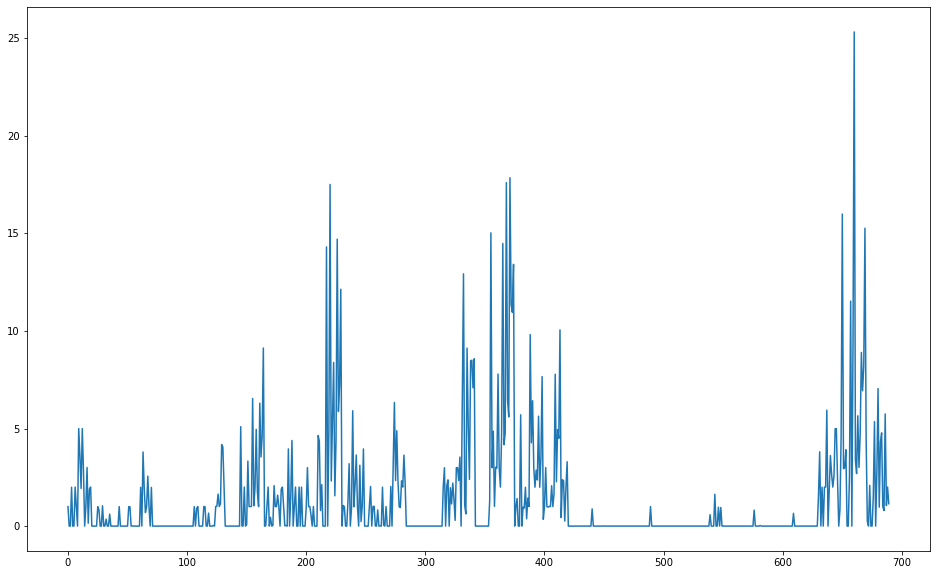

In [132]:
plt.plot(all_phis[0])

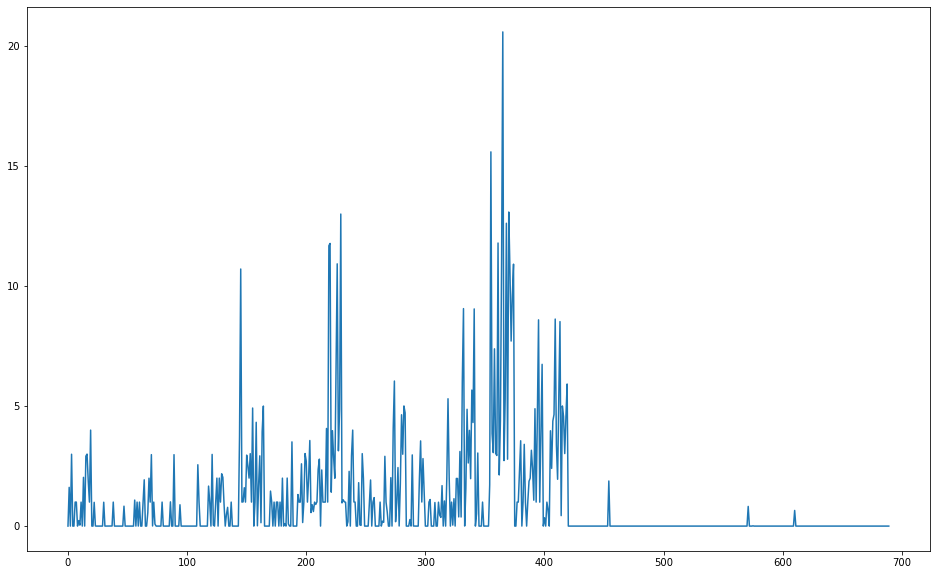

In [117]:
plt.plot(phi)

In [159]:
n = len(msa)
all_phis = np.zeros((n, 690))
for i, sequence in enumerate(msa):
    phi = get_phis_from_info_and_sequence_v3(info, sequence, n_parameters=690, verbose=False)
    all_phis[i] = phi

In [160]:
energy = all_phis.dot(gamma[:690])

In [161]:
msa[1]

'---SAALWTAFGILVTSSVVFYILLLFQPVG---RRIFHVYTFTITATASVCYLLMSVQQGYKIVGV----RPVYWIRYVDWLVTTPLILLDLGTLISIDHDKIVLLIFLDLLMILSGAVGSFV-GNWQNLFFWGAGMLFYILIVFEVFSAIRFLSNRISVKVKNLYLLLATSTVSVWSMYPIVWLLADGL-NIMPVDLETILYALLDISAKCAFGFVLLLSREAV-'

In [162]:
energy[:2]

array([-50.96339197, -58.00760879])

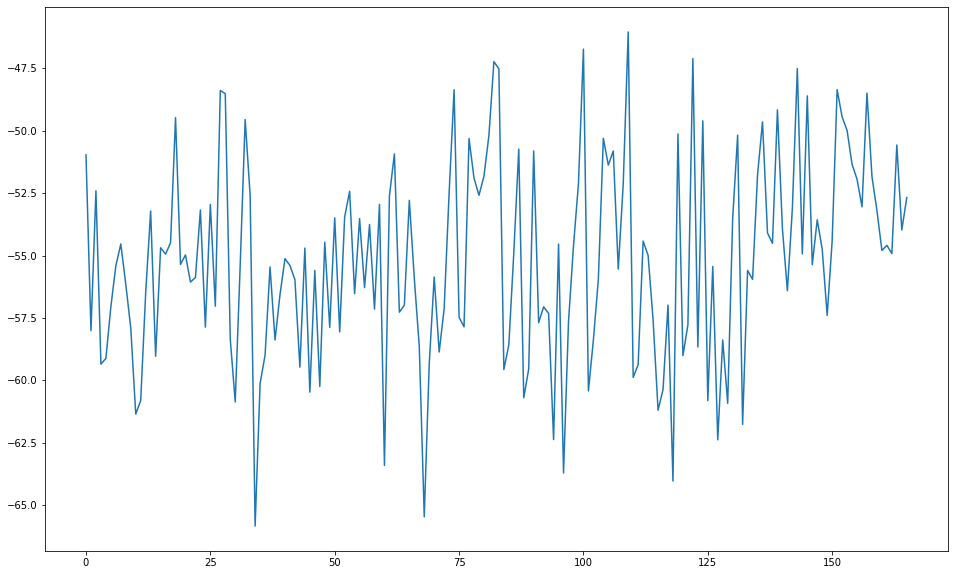

In [163]:
plt.plot(energy)

In [100]:
sequence

'TGRPEWIWLALGTALMGLGTLYFLVKGMGVSDPDAKKFYAITTLVPAIAFTMYLSMLLGYGLTMVPFGGEQNPIYWARYADWLFTTPLLLLDLALLVDADQGTILALVGADGIMIGTGLVGALTKVYSYRFVWWAISTAAMLYILYVLFFGFTSKAESMRPEVASTFKVLRNVTVVLWSAYPVVWLIGSEGAGIVPLNIETLLFMVLDVSAKVGFGLILLRSRAIFG'

In [101]:
phi.dot(gamma)

-6.28682507191618

In [94]:
phi.shape

(690,)

In [95]:
gamma.shape

(690,)

In [97]:
info

Unnamed: 0       phi  res1  res2                 Type res1_name  \
0              0  0.046416     0    58               Direct       THR   
1              1  0.953461     0    58   LowDensityMediated       THR   
2              2  0.000123     0    58  HighDensityMediated       THR   
3              3  0.000016     0    56  HighDensityMediated       THR   
4              4  0.031239     0    61   LowDensityMediated       THR   
...          ...       ...   ...   ...                  ...       ...   
1879        1879  0.001091   172   210                  NaN       VAL   
1880        1880  0.996752   172   214                  NaN       VAL   
1881        1881  0.869318   176   210                  NaN       LEU   
1882        1882  0.999921   179   206                  NaN       ALA   
1883        1883  0.902714   183   203                  NaN       VAL   

     res2_name  interaction_index interactionTerm  res1_2  res2_2 direction  \
0          GLY                128         contact     NaN     NaN       NaN   
1          GLY                548         contact     NaN     NaN       NaN   
2          GLY                338         contact     NaN     NaN       NaN   
3          LEU                371         contact     NaN     NaN       NaN   
4          LEU                581         contact     NaN     NaN       NaN   
...        ...                ...             ...     ...     ...       ...   
1879       ALA               1181        fourBody   176.0   206.0      anti   
1880       PHE               1017        fourBody   176.0   210.0      anti   
1881       ALA               1183        fourBody   180.0   206.0      anti   
1882       LEU                966        fourBody   183.0   202.0      anti   
1883       PHE               1172        fourBody   187.0   199.0      anti   

     res1_2_name res2_2_name  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
1879         LEU         LEU  
1880         LEU         ALA  
1881         TYR         LEU  
1882         VAL         LEU  
1883         GLY         GLU  

[1884 rows x 14 columns]

In [164]:
np.loadtxt("/Users/weilu/Research/server/oct_2020/membrane_protein_structure_prediction/setups/1py6/ff_contact_mode1/direct.dat")

array([[ 0.     , -0.00179, -0.00151, ..., -0.00074, -0.00149, -0.00094],
       [-0.00179,  0.     ,  0.00073, ..., -0.00493, -0.0018 , -0.00032],
       [-0.00151,  0.00073,  0.     , ..., -0.00408, -0.00136, -0.00145],
       ...,
       [-0.00074, -0.00493, -0.00408, ...,  0.     , -0.05772, -0.00247],
       [-0.00149, -0.0018 , -0.00136, ..., -0.05772,  0.     , -0.0018 ],
       [-0.00094, -0.00032, -0.00145, ..., -0.00247, -0.0018 ,  0.     ]])

In [ ]:
    with open(toFile, "w") as out:
        for i in range(210):
            g = a[i][0]
            out.write(f"{g}\n")
        for i in range(210):
            g = a[i+210][0]
            out.write(f"{g}\n")
        for i in range(210):
            g = a[i+210][1]
            out.write(f"{g}\n")

In [186]:
g = np.loadtxt("/Users/weilu/opt/parameters/globular_parameters/membrane_gamma.dat")
b = np.loadtxt("/Users/weilu/opt/parameters/globular_parameters/burial_gamma.dat")
x = np.zeros(690)
for i in range(210):
    x[i] = g[i][0]
for i in range(210):
    x[i+210] = g[i+210][0]
    x[i+420] = g[i+210][1]
    
count = 0
for i in range(3):
    for j in range(20):
        x[630+count] = b[j][i]
        count += 1

In [187]:
x = -x
x - np.loadtxt("/Users/weilu/opt/parameters/original_gamma")

array([ 1.18369e+00,  9.78200e-02,  6.02200e-02, -2.32850e-01,
        3.84910e-01, -1.55320e-01, -2.05030e-01,  1.93900e-02,
        3.33070e-01,  3.63200e-01,  6.90500e-01,  1.97610e-01,
        3.73790e-01,  8.17720e-01, -3.22790e-01,  1.80400e-02,
       -3.74440e-01,  9.47640e-01,  3.04100e-01,  3.50170e-01,
       -4.26560e-01,  5.39200e-02, -4.23200e-01, -2.26270e-01,
        8.73700e-02, -4.83520e-01, -3.30260e-01, -1.10530e-01,
       -2.75840e-01, -1.00050e-01, -5.14120e-01, -2.22980e-01,
        2.93100e-01, -8.13020e-01, -2.80700e-02, -4.96210e-01,
        2.31800e-02, -8.13400e-02, -2.61860e-01, -1.13905e+00,
       -7.19250e-01,  1.93740e-01, -7.07430e-01, -7.90810e-01,
       -4.70730e-01,  2.60500e-02, -6.76150e-01, -3.31630e-01,
       -7.36390e-01, -5.39970e-01, -3.15600e-02, -9.92400e-01,
       -1.03194e+00, -8.83170e-01, -2.84770e-01, -1.12050e-01,
       -6.01210e-01, -3.64040e-01, -2.78270e-01, -8.78710e-01,
       -5.43140e-01, -7.58960e-01, -2.40530e-01, -6.939

In [190]:
np.savetxt("/Users/weilu/opt/parameters/original_membrane_gamma", x, fmt='%.6f')

In [ ]:
gamma_for_simulation = pre + f"gamma.dat"
burial_gamma_for_simulation = pre + f"burial_gamma.dat"
debye = pre + f"k_debye.dat"
# gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation)
gamma_format_convertion_iteration_to_simulation(iter_gamma, gamma_for_simulation, burial_gamma_for_simulation=burial_gamma_for_simulation, debye=debye, mode=args.mode)
